# РИМ-181228
## Методы обработки изображений 
## Секлецов Д.И.

## Сегментация

In [1]:
import numpy as np
from skimage import data
from skimage.feature import canny
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.color import label2rgb

In [3]:
coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

Text(0.5,1,'histogram of grey values')

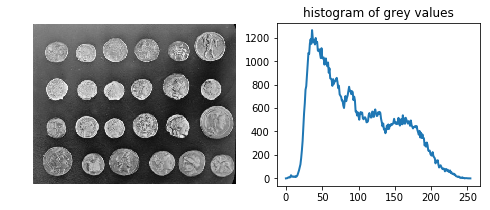

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of grey values')

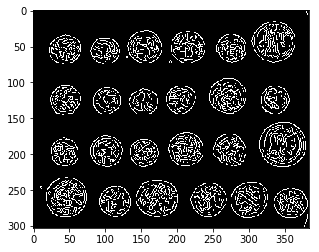

In [5]:
edges = canny(coins/255.)
plt.imshow(edges, cmap=plt.cm.gray)

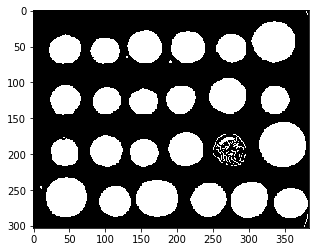

In [6]:
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins, cmap=plt.cm.gray)

In [7]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

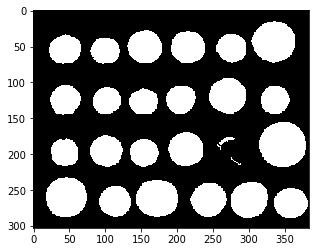

In [8]:
plt.imshow(coins_cleaned, cmap=plt.cm.gray)

In [9]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

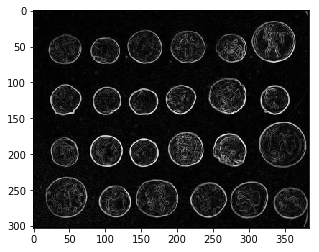

In [10]:
elevation_map = sobel(coins)
plt.imshow(elevation_map, cmap=plt.cm.gray)

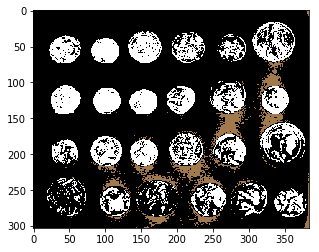

In [11]:
plt.imshow(markers, cmap=plt.cm.cubehelix)

In [12]:
segmentation = watershed(elevation_map, markers)

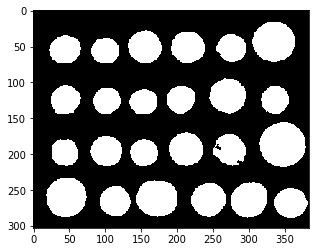

In [13]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [14]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

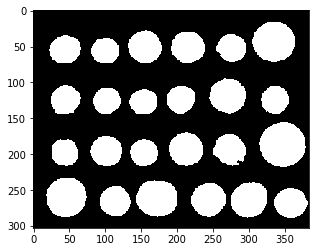

In [15]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [16]:
labeled_coins, _ = ndi.label(segmentation)

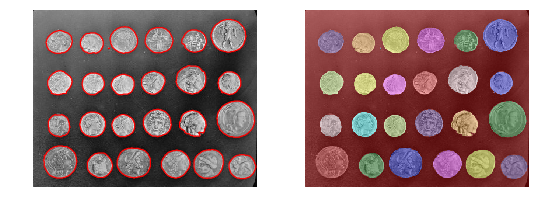

In [17]:
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')
    a.set_adjustable('box-forced')

plt.tight_layout()

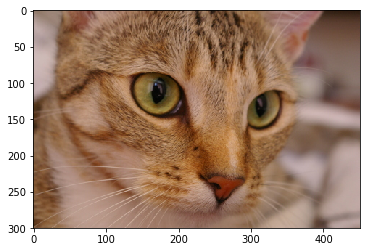

In [18]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.chelsea()
plt.imshow(image)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [20]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<matplotlib.figure.Figure at 0xd0a8cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd0b3fd0>)

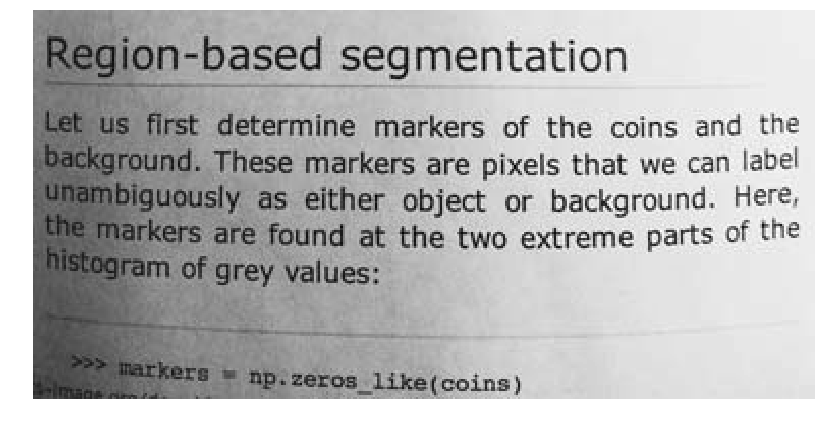

In [21]:
text = data.page()
image_show(text)

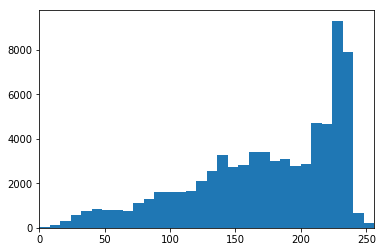

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

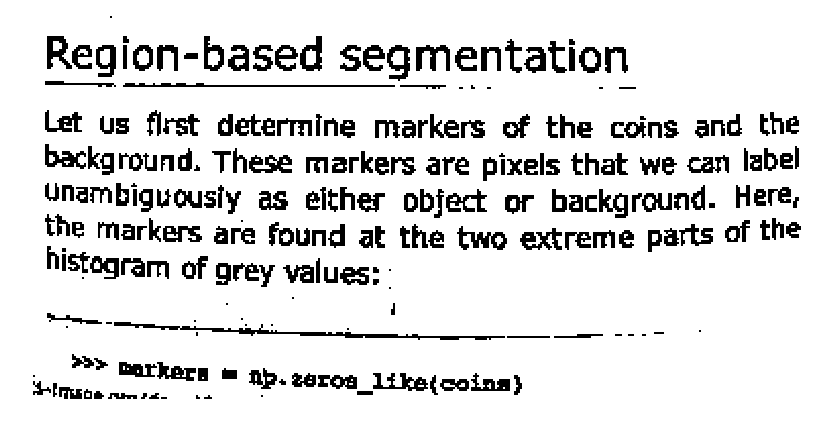

In [23]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

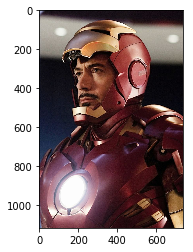

In [12]:
from skimage import io
image = io.imread('Iron_Man.jpg') 
plt.imshow(image);

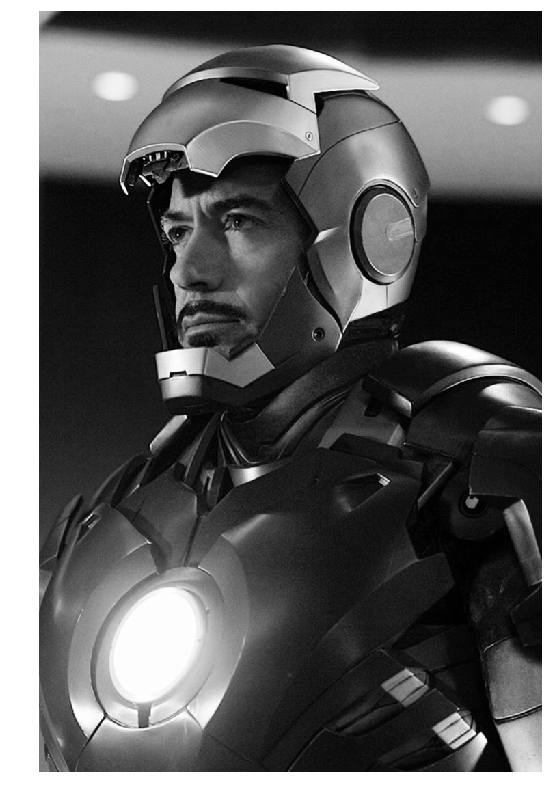

In [25]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [26]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(300, [370, 270], 140)[:-1]

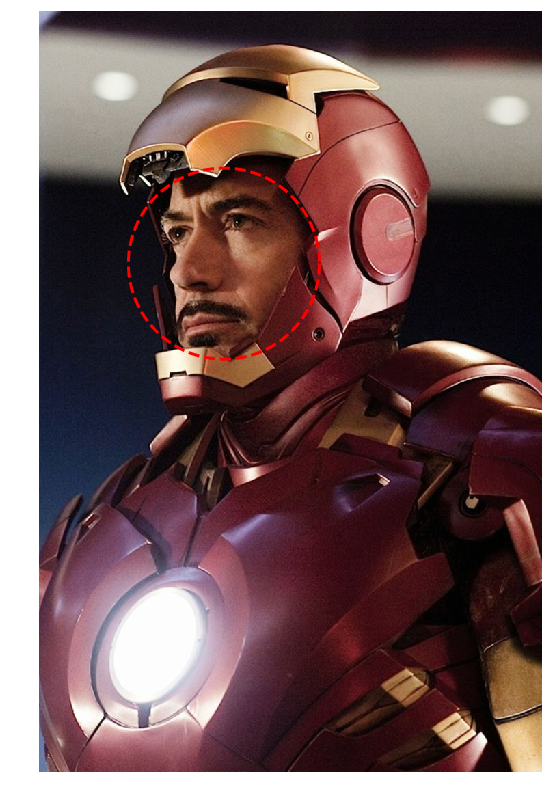

In [27]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

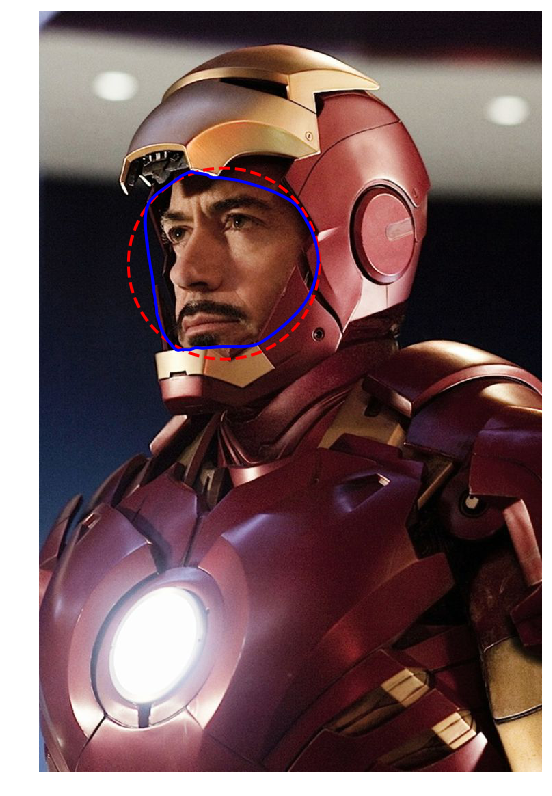

In [28]:
snake = seg.active_contour(image_gray, points,alpha=0.08,beta=2)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [29]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

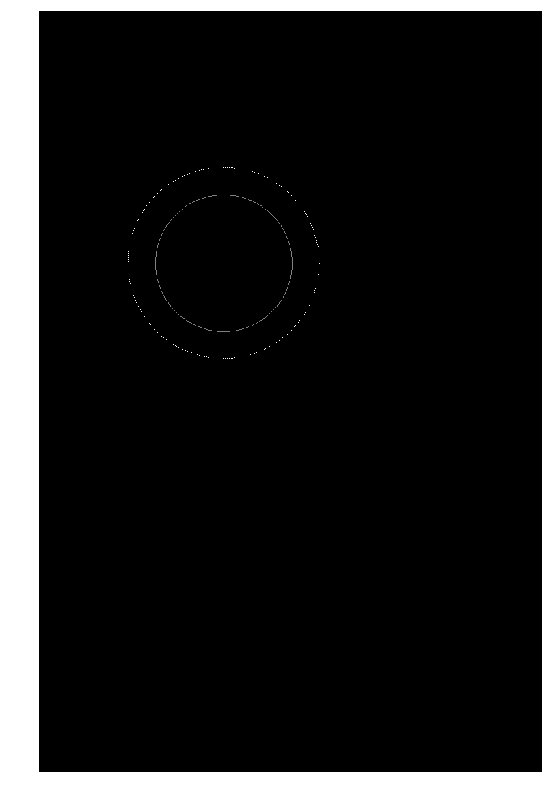

In [30]:
indices = draw.circle_perimeter(370, 270,100)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

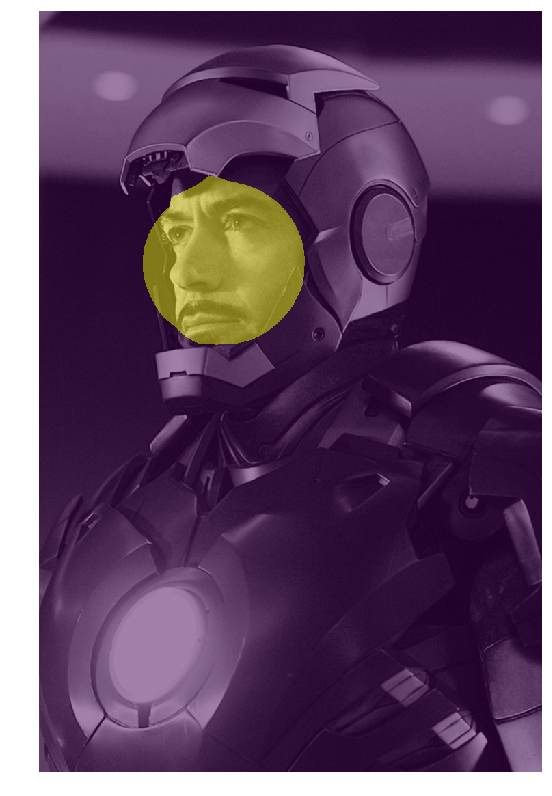

In [31]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.5);

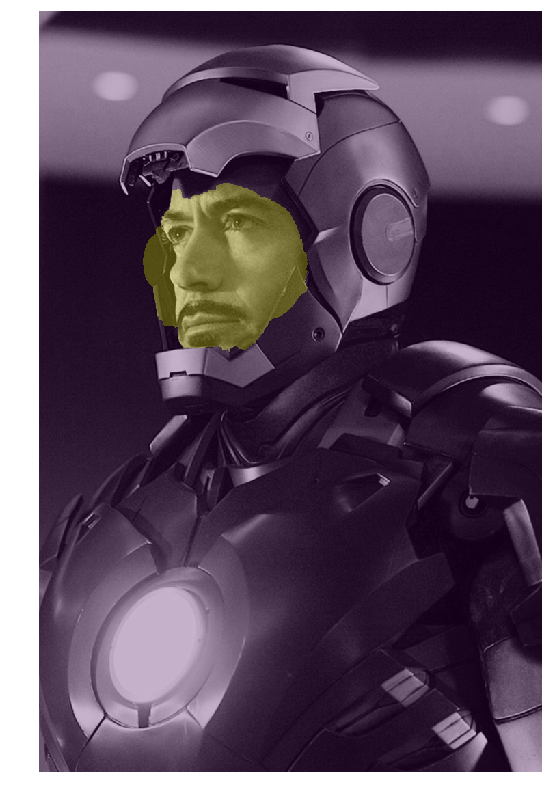

In [32]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

In [33]:
image_slic = seg.slic(image,n_segments=155)

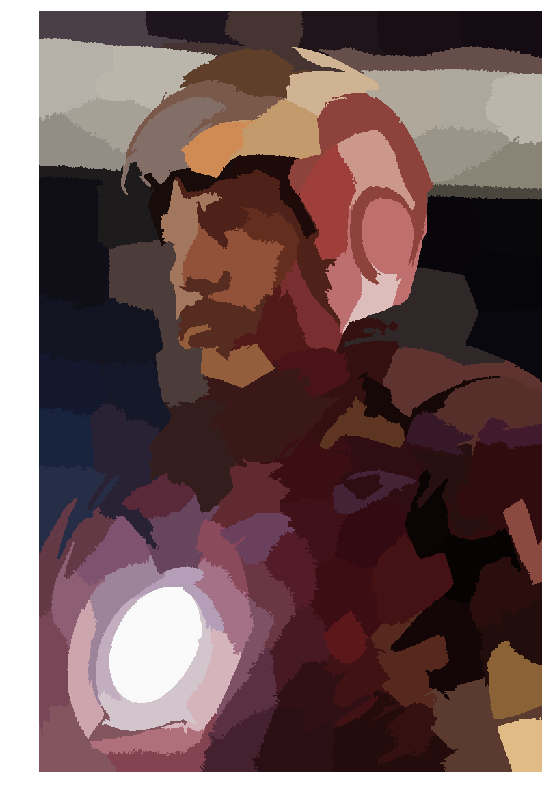

In [34]:
image_show(color.label2rgb(image_slic, image, kind='avg'));

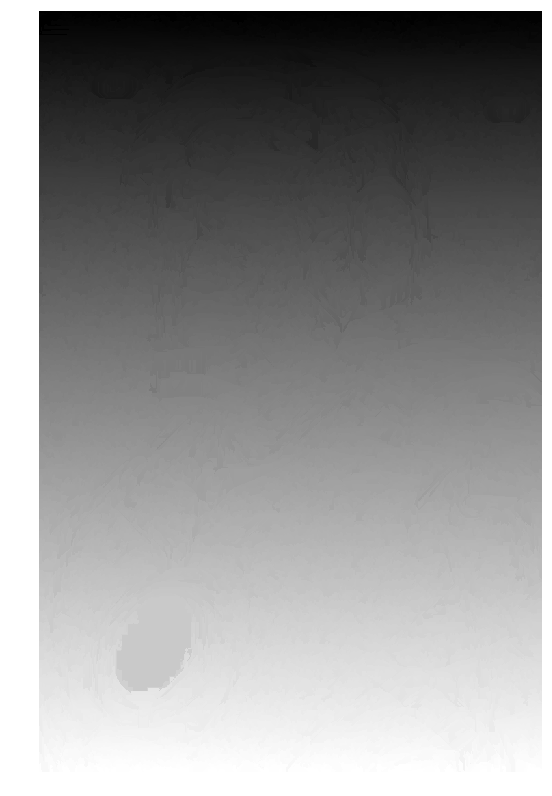

In [35]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb);

In [36]:
np.unique(image_felzenszwalb).size

11381

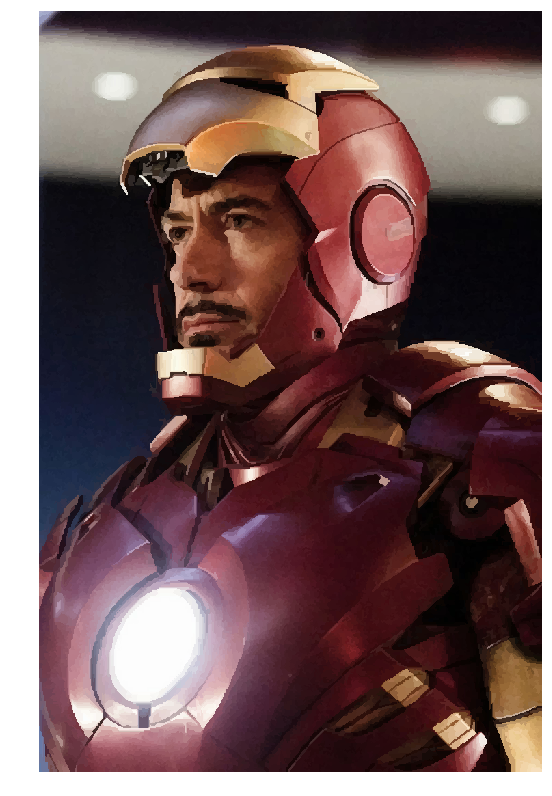

In [ ]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);

In [17]:
# добавим необходимый пакет с opencv
import cv2
# загружаем изображение и отображаем его
image = cv2.imread("matrix-sunglasses.jpg")
cv2.imshow("Original image", image)
cv2.waitKey(0)

48

In [3]:
print(image)

[[[ 0  1  5]
  [ 4  7 11]
  [ 5  8 12]
  ...
  [ 2  3  0]
  [ 2  3  0]
  [ 2  3  0]]

 [[16 19 23]
  [22 25 29]
  [23 26 30]
  ...
  [10 11  7]
  [10 11  7]
  [10 11  7]]

 [[13 16 20]
  [20 23 27]
  [20 23 27]
  ...
  [11 12  8]
  [11 12  8]
  [11 12  8]]

 ...

 [[ 4  2  2]
  [ 4  2  2]
  [ 4  2  2]
  ...
  [ 9 12 10]
  [ 9 12 10]
  [ 9 12 10]]

 [[ 4  2  2]
  [ 4  2  2]
  [ 4  2  2]
  ...
  [ 7 10  8]
  [ 7 10  8]
  [ 7 10  8]]

 [[ 4  2  2]
  [ 4  2  2]
  [ 4  2  2]
  ...
  [ 0  3  1]
  [ 0  3  1]
  [ 0  3  1]]]


In [4]:
print(image.shape)

(667, 1600, 3)


In [5]:
# вырежем участок изображения используя срезы
# мы же используем NumPy
cropped = image[30:230, 330:600]
cv2.imshow("Cropped image", cropped)
cv2.waitKey(0)

48

In [6]:
# вырежем участок изображения используя срезы
# мы же используем NumPy
cropped = image[30:130, 150:300]
cv2.imshow("Cropped image", cropped)
cv2.waitKey(0)

48

In [7]:
# получим размеры изображения для поворота
# и вычислим центр изображения
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
 
# повернем изображение на 180 градусов
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("Rotated image", rotated)
cv2.waitKey(0)

48

In [8]:
#отразим изображение по горизонтали
flip_image = cv2.flip(image,1)
cv2.imshow("Flip image", flip_image)
cv2.waitKey(0)

48

In [9]:
# запишем изображение на диск в формате png
cv2.imwrite("flip.png", flip_image)

True

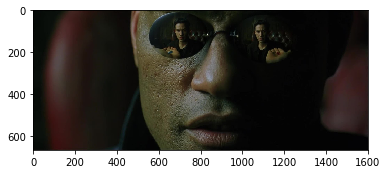

In [16]:
image_flip = io.imread("flip.png")
#print(image_flip)
plt.imshow(image_flip);